In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(x_train[:1])

x_train = x_train/255
print(x_train[:1])

x_test = x_test/255

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  18 219 253 253 2

In [5]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=10)
print(y_train[:5])


[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
from keras.models import Model
from keras import Sequential
from keras.layers import Conv1D, BatchNormalization, Dense, Flatten, Dropout
from keras import Input

In [7]:
i_layer = Input(shape=(28,28))

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(i_layer)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

# Additional
# x = Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization(momentum = 0.9)(x)
# x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)

o_layer = Dense(units=10, activation='softmax')(x)

model = Model(i_layer, o_layer)

In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 32)         │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,418 (489.91 KB)

 Trainable params: 125,226 (489.16 KB)

 Non-trainable params: 192 (768.00 B)

In [9]:
model.fit(x_train, y_train, batch_size=1000, epochs=200, validation_split=0.2, verbose=2)

Epoch 1/200
48/48 - 4s - 90ms/step - accuracy: 0.6974 - loss: 0.9672 - val_accuracy: 0.9252 - val_loss: 0.2504
Epoch 2/200
48/48 - 2s - 36ms/step - accuracy: 0.9079 - loss: 0.2976 - val_accuracy: 0.9562 - val_loss: 0.1457
Epoch 3/200
48/48 - 2s - 35ms/step - accuracy: 0.9352 - loss: 0.2095 - val_accuracy: 0.9666 - val_loss: 0.1139
Epoch 4/200
48/48 - 2s - 34ms/step - accuracy: 0.9476 - loss: 0.1683 - val_accuracy: 0.9711 - val_loss: 0.0972
Epoch 5/200
48/48 - 2s - 40ms/step - accuracy: 0.9566 - loss: 0.1402 - val_accuracy: 0.9731 - val_loss: 0.0846
Epoch 6/200
48/48 - 2s - 34ms/step - accuracy: 0.9618 - loss: 0.1231 - val_accuracy: 0.9760 - val_loss: 0.0778
Epoch 7/200
48/48 - 2s - 35ms/step - accuracy: 0.9656 - loss: 0.1117 - val_accuracy: 0.9770 - val_loss: 0.0738
Epoch 8/200
48/48 - 2s - 35ms/step - accuracy: 0.9685 - loss: 0.1012 - val_accuracy: 0.9768 - val_loss: 0.0742
Epoch 9/200
48/48 - 2s - 41ms/step - accuracy: 0.9712 - loss: 0.0929 - val_accuracy: 0.9789 - val_loss: 0.0669
E

In [10]:
prediction = model.predict(x_test)
print(prediction[:5])

prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])
print(y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[2.83399353e-23 2.20292689e-16 4.69489119e-14 1.32663845e-11
  3.28392712e-25 4.87069303e-16 2.83366348e-27 1.00000000e+00
  3.76217931e-20 3.60471765e-12]
 [1.49516509e-16 7.23592741e-09 1.00000000e+00 2.40777776e-15
  1.70644194e-19 9.41418716e-23 4.16765240e-15 5.51730263e-16
  2.19101106e-22 9.68630078e-25]
 [6.71512911e-20 1.00000000e+00 3.26664260e-13 5.16363878e-19
  8.85133122e-09 1.50163028e-15 6.54938580e-16 2.41835579e-10
  7.63687345e-14 2.96411011e-18]
 [9.99999762e-01 9.49181481e-17 4.14427146e-13 3.58987877e-14
  3.84370948e-14 1.33924117e-14 2.25536667e-07 1.69070707e-14
  1.80387758e-12 6.62781868e-14]
 [3.07906815e-21 2.67893973e-21 3.21558001e-21 1.61630153e-23
  1.00000000e+00 1.20977095e-20 2.04303156e-17 3.51026335e-16
  7.70863119e-20 1.30769102e-11]]
[7 2 1 0 4]
[7 2 1 0 4]


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

0.9914
[[ 977    0    0    0    1    0    1    1    0    0]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   1    1 1025    1    0    0    1    2    1    0]
 [   0    0    1 1001    0    5    0    1    1    1]
 [   0    0    0    0  972    0    4    0    1    5]
 [   1    0    0    5    0  883    3    0    0    0]
 [   1    2    0    0    1    2  951    0    1    0]
 [   0    1    8    0    0    0    0 1017    0    2]
 [   3    0    1    1    0    2    0    3  961    3]
 [   1    0    1    0    3    2    0    5    2  995]]


In [13]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'actual')

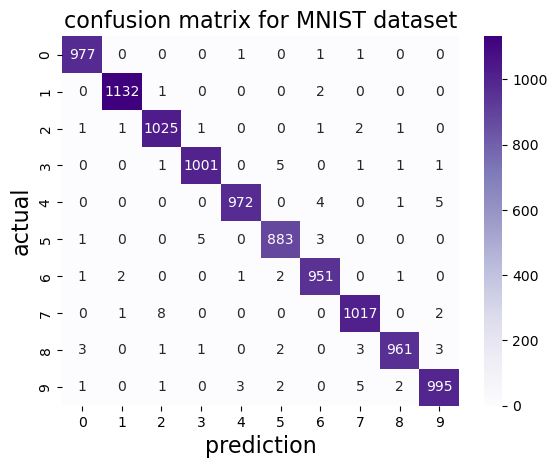

In [14]:
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
ax.set_title('confusion matrix for MNIST dataset', fontsize=16)
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)

In [15]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
from tensorflow import keras

# Load your trained Keras model
#model = keras.models.load_model("model.h5")

# Create a Tkinter window
class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Draw a Digit")
        self.canvas = tk.Canvas(self, width=280, height=280, bg='white')
        self.canvas.pack()
        self.button = tk.Button(self, text="Predict", command=self.predict)
        self.button.pack()
        self.clear_button = tk.Button(self, text="Clear", command=self.clear)
        self.clear_button.pack()

        self.canvas.bind("<B1-Motion>", self.paint)
        self.image1 = Image.new("L", (280, 280), color=255)
        self.draw = ImageDraw.Draw(self.image1)

    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black')
        self.draw.ellipse([x1, y1, x2, y2], fill=0)

    def clear(self):
        self.canvas.delete("all")
        self.draw.rectangle([0, 0, 280, 280], fill=255)

    def predict(self):
        img = self.image1.resize((28, 28))
        img = ImageOps.invert(img)
        img = np.array(img).astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=0)  # Keras expects (batch_size, height, width)

        output = model.predict(img)
        pred = np.argmax(output)

        print(f"Predicted digit: {pred}")
        self.title(f"Predicted: {pred}")


# Run the app
app = App()
app.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

In [16]:
model.save('../models/mnist-model-2.h5')